# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv('data/train.csv')
df.head()

,Tern,Thrush,Tick,Tiger,Tiglon,Toad,Tortoise,Trout,Tuna,Turkey,...,Weasel,Whale,Whippet,Whitefish,Wildcat,Wildebeest,Wildfowl,Wolf,Wolverine,target
0,-253077.772390,-49.659246,-0.679765,s,NaN,l,-12.055165,-463.332642,-41860.419322,3.256739e+05,...,a,-3.297065e+06,-0.974495,-3.536578e+07,-395.159010,0.021952,b,k1,m,1
1,380192.123132,-49.659246,-1.356456,s,False,l,-30.235998,-388.822813,-94810.029959,1.154421e+03,...,b,-1.043690e+06,-1.342061,-3.536549e+07,609.332121,0.269383,b,m1,x,0
2,-218627.876963,-49.659246,-0.542194,s,False,l,-10.443575,-519.014942,-46075.931683,2.248867e+06,...,a,4.892868e+06,-1.335934,-3.536456e+07,1175.536902,0.341417,b,s2,r,0
3,-178076.879466,-49.659246,-0.485974,s,NaN,l,-8.374563,-504.614247,-73554.391505,1.452062e+07,...,a,2.814345e+07,-1.073553,-3.536497e+07,-359.320759,0.003191,m,k1,w,0
4,-169250.190006,-49.659246,-0.600561,s,False,l,-10.269902,-455.225099,-41390.990681,2.689196e+05,...,a,-1.801627e+05,-1.341853,-3.536321e+07,-346.856580,-0.250332,b,j1,s,0


In [3]:
# show summary statistics for all columns
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Tern,7003.0,NaN,NaN,NaN,-64560.656476,175304.482673,-377324.54164,-194772.839802,-90079.791283,35542.721707,870769.591347
Thrush,7003.0,NaN,NaN,NaN,-45.024356,14.379231,-49.659246,-49.659246,-49.659246,-49.659246,0.0
Tick,7003.0,NaN,NaN,NaN,-0.854321,0.323684,-1.383081,-1.125735,-0.882567,-0.60254,-0.040281
Tiger,7003,3,s,6456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiglon,3617,1,False,3617,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Toad,7003,7,l,4137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tortoise,7003.0,NaN,NaN,NaN,-16.804919,7.274371,-32.266476,-22.481011,-16.846875,-11.050078,-0.030102
Trout,7003.0,NaN,NaN,NaN,-451.048325,43.668302,-576.555826,-481.822702,-445.725183,-418.775842,-343.839588
Tuna,7003.0,NaN,NaN,NaN,-58391.135016,30977.224125,-96305.806393,-87535.44695,-64779.314296,-30984.879512,-0.428025
Turkey,7003.0,NaN,NaN,NaN,827432.082619,1869694.489367,0.0,76033.34881,176642.078779,627998.926092,38582950.594445


### Observations
From the summary statistics, we can see that the target label is heavily skewed towards 0.

Feature Vicuna has no data. So we will drop this feature.

Tiglon has only one explicit label - False. The absence of this label can safely be assumed as True. So we will replace the missing values with True.

Additionaly, more than 50% of data is missing for the feature Wallaby. We can try to impute the missing values with the mean of the feature, but the missing values can also be determining factor on the labels. We can check the label distribution for the missing values and if the distribution is similar to the overall distribution, we can safely impute the missing values with the mean or just drop the feature.

In [4]:
wallaby_not_null_target = df[df['Wallaby'].notnull()]['target'].mean()
wallaby_is_null_target = df[df['Wallaby'].isnull()]['target'].mean()
print('Mean of target when Wallaby is present: ', wallaby_not_null_target)
print('Mean of target when Wallaby is missing: ', wallaby_is_null_target)

Mean of target when Wallaby is present:  0.13944108326130797
Mean of target when Wallaby is missing:  0.14609286523216308


We can see that the mean value of target, which is between 0 and 1, is quite similar if Wallaby is present or absent. Considering this, and the fact that more than 50% of data is missing, we can safely ignore this feature.

In [5]:
df = df.drop(columns=["Vicuna", "Wallaby"])

df = df.astype({'Tiglon': 'string'})
df.loc[df['Tiglon'].isnull(), 'Tiglon'] = 'True'

## Covariate analysis
Since we have a lot of features, its difficult to show covariate scatter plots for all of them. So we calculate and plot the correlation coefficient for all the features.

<Axes: >

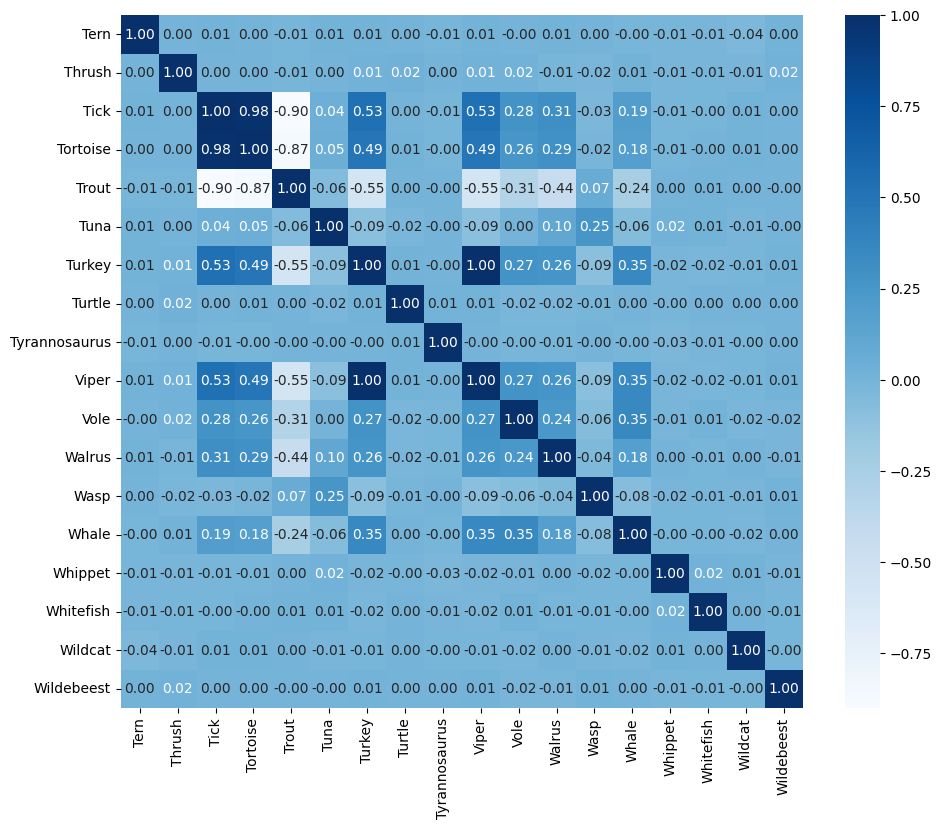

In [6]:
numerical_cols = df.select_dtypes(include='number').columns.drop('target')
corr = df[numerical_cols].corr()

plt.figure(figsize=(11, 9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

We can see in the correlation map that some features are highly correlated with each other, and some have high negative correlation as well. We can drop one of the features from the correlated features.

In [7]:
df = df.drop(columns=["Turkey", "Tick", "Trout"])

### Feature Importance
We can use the feature importance from the random forest classifier to see which features are important for the classification.

In [8]:
import tensorflow_decision_forests as tfdf

# target labels are already integers as required by tfdf
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(df, label="target")
model = tfdf.keras.RandomForestModel()
model.fit(x=train_ds)

2023-11-11 20:32:43.205412: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 20:32:43.263737: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 20:32:43.263779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 20:32:43.263807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-11 20:32:43.278583: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 20:32:43.279654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Use /tmp/tmp8fmvqixm as temporary training directory
Reading training dataset...


2023-11-11 20:32:46.041334: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-11 20:32:46.042049: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Training dataset read in 0:00:05.680821. Found 7003 examples.
Training model...


[INFO 23-11-11 20:32:52.6907 EST kernel.cc:1233] Loading model from path /tmp/tmp8fmvqixm/model/ with prefix 187631f74bc54717


Model trained in 0:00:01.143397
Compiling model...


[INFO 23-11-11 20:32:52.9399 EST decision_forest.cc:660] Model loaded with 300 root(s), 105346 node(s), and 25 input feature(s).
[INFO 23-11-11 20:32:52.9400 EST abstract_model.cc:1343] Engine "RandomForestGeneric" built
[INFO 23-11-11 20:32:52.9400 EST kernel.cc:1061] Use fast generic engine


Model compiled.


In [9]:
model.make_inspector().variable_importances()['INV_MEAN_MIN_DEPTH']

[("Wasp" (1; #15), 0.2567982200510262),
 ("Tuna" (1; #6), 0.21188314657659535),
 ("Warbler" (4; #14), 0.17895076215469408),
 ("Wolverine" (4; #24), 0.1470951722235017),
 ("Viper" (1; #10), 0.1402378576219563),
 ("Whale" (1; #17), 0.1357571469813859),
 ("Vulture" (4; #12), 0.13499056607358606),
 ("Urial" (4; #9), 0.11877932603082772),
 ("Tortoise" (1; #5), 0.11391571082565573),
 ("Wolf" (4; #23), 0.10920761559620051),
 ("Vole" (1; #11), 0.10762041371271011),
 ("Walrus" (1; #13), 0.10680589473807287),
 ("Toad" (4; #4), 0.10456125404911756),
 ("Whitefish" (1; #19), 0.09945906164462963),
 ("Tern" (1; #0), 0.09915442944937346),
 ("Wildebeest" (1; #21), 0.09907461102629968),
 ("Tyrannosaurus" (1; #8), 0.09806054794913589),
 ("Wildcat" (1; #20), 0.09800038408853605),
 ("Whippet" (1; #18), 0.09648342580281054),
 ("Turtle" (1; #7), 0.09600781333844141),
 ("Weasel" (4; #16), 0.09599624105869463),
 ("Wildfowl" (4; #22), 0.09467602900157918),
 ("Thrush" (1; #1), 0.09409229095275491),
 ("Tiglon" (4

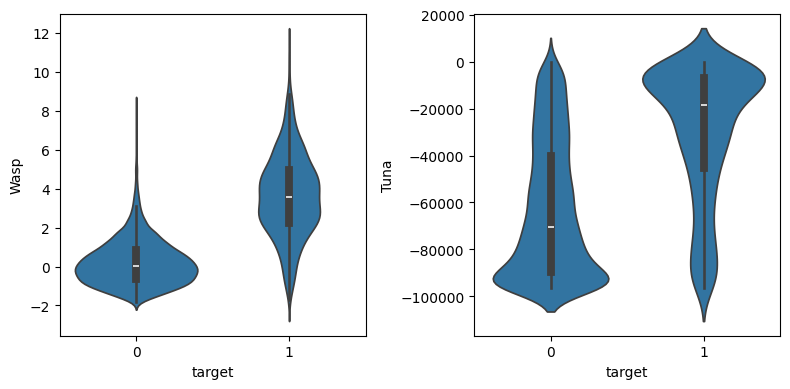

In [30]:
# We can see that features Wasp Tuna and Warbler are the most important features affecting the target variable.
# We can visualize the distribution of these features with respect to the target variable.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.violinplot(x='target', y='Wasp', data=df, ax=axes[0])
ax[0].set_title('Wasp')
sns.violinplot(x='target', y='Tuna', data=df, ax=axes[1])
ax[1].set_title('Tuna')
fig.tight_layout()